In [1]:
#from operator import itemgetter
from sklearn.metrics.pairwise import cosine_similarity
#from bns import BNS

In [2]:
import re
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import pandas as pd
import random
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
import matplotlib.pyplot as plt
import multiprocessing
import time
import gensim
from gensim import corpora
from gensim.corpora.dictionary import Dictionary

In [3]:
data=pd.read_excel("C:\\Users\\touQer_abaS\\Desktop\\Final Dataset for Semantics.xlsx")
#data

In [4]:
data_preprocess=data.drop(columns=["Sr. No","Name","Designation","Institute","Expertise"])
#data_preprocess

In [5]:
def Lemmitzer(sentence):
    lemitizer=WordNetLemmatizer()
    words=nltk.word_tokenize(sentence)
    newword=[lemitizer.lemmatize(word) for word in words]
    str_=' '.join(word for word in newword)
    return str_

In [6]:
def Stemmer(sentence):
    stemmer= PorterStemmer()
    words=nltk.word_tokenize(sentence)
    newword=[stemmer.stem(word) for word in words]
    str_=' '.join(word for word in newword)
    return str_

In [7]:
def tokinize_data(data):
    list=[]
    filtered_sentence=str()
    stop_words = set(stopwords.words('english'))
    for sentence in data:
        sentence=re.sub(r"\W"," ",sentence)
        sentence=re.sub(r"\s+"," ",sentence)
        sentence=re.sub(r"\s[a-zA-Z]\s+"," ",sentence)
        sentence=sentence.lower()
        sentence=" ".join([w for w in nltk.word_tokenize(sentence) if w not in stop_words])
        filtered_sentence=Lemmitzer(sentence)
        list.append(filtered_sentence)
    return list

In [8]:
dict={}
for i in data_preprocess.columns:
    dict[i]=tokinize_data(data[i])
#dict

In [9]:
new_data = pd.DataFrame(dict)
new_data

,Q1: How does soil health affect crop productivity?,Q2. What are the Impacts of certified and uncertified seed in crop productivity?,Q3. How can insect pest problem be minimized to increase Agriculture Productivity without harming the Environment?,Q4. What are impact of plant disease and insects/pest on Crop Productivity?,Q5. How we can resolve water shortage issues and challenges in Agriculture?,Q6. How does climate change affects agriculture and farmers?,Q7. How can precision agriculture be helpful in improving Agriculture and crop Productivity,Q8. What are pros and cons of synthetic fertilizer in Agriculture sector?,Q9. How we can improve the post-harvest losses of Crops/Fruits/Vegetables?,Q10. How Government policies affect in sustainable Agriculture Growth?
0,soil complex nutriants micro organisim soil bo...,health certified seed ensures high yield un ce...,use biocontrd agent green meauring organnic ma...,plant disease insect serevely damage crop redu...,resolve water shortage issue introducing varit...,climate change affect agriculture various way ...,taimly application input varietal selection cu...,synthectic fertilizer quick action provide nut...,post harvest treatment careful handling,govt policy affect sustainable agriculture gro...
1,soil health indicate generate good quality foo...,certified seed may genrate good production com...,biological control play significant role incre...,plant disease insect pest negative impact crop...,dam mini dam required soil moisture couservati...,agriculture department climate climate changde...,precision agriculture need day,synthalie fatilizer application best nutriants...,mechinized farming,significant effect
2,soil medium plant growth soil good water holdi...,certified seed planted crop show uniformity ge...,using natural enemy pest minimized without har...,plant disease onset pest feel damage different...,water shortage issue challenge agriculture reo...,due climate change tempreature increase lifecy...,precision agriculture vary helpful improving a...,main advantage syththetic fertilizer 15 readil...,adopting new method harvesting pest harvest lo...,policy government direct impact sustainable ag...
3,decrease overall plant growth development ulti...,certified seed pure clean healthy give farmer ...,biological control first beneficial way second...,reduce yield 20 80 depending upon severity,deceloping water depicit drought tolerant geno...,disturbing plout growth flowering pattern seed...,farmer well organized earn profit several reso...,although synthetic fertilizer boot yield resid...,adopting proper storage processing practice,government policy great effect agriculture gro...
4,poor soil poor yield many disorder cause veget...,certified seed positive impact showing proper ...,attractants refellants used trap biological ha...,damage crop yield reduced cost pro increase qu...,modification crop selection method flooding li...,crop show disorder rduced growth early late ri...,surely play role economical us input right sta...,soil deficient regarding nutrient applied brig...,balanced fertilizer careful handing harvesting...,design proper policy execute properly policy a...
5,soil health affect crop productivity soil medi...,seed certified uncertified seed poor quality l...,biological control insect may environment frie...,plant disease lower plant health lead stunted ...,manage water shortage efficient utilization ir...,agriculture dependent various climatic factor ...,precision agriculture helpful improving agricu...,synthetic fertilizer play role enhancing produ...,increasing storage condition enhancing shelf l...,cost production different crop increasing day ...
6,good soil rich plant nutrient helpful increasi...,good quality certified seed true type helpful ...,saving natural enemy insect pest using biologi...,greatly reduced yield affecting growth plant,water conservation using modern irrigation sys...,climate change greatly affect productivity cro...,improve yield providin

In [10]:
context_size = 7
num_workers = multiprocessing.cpu_count()
min_word_count = 1
num_features = 300
seed = 1
word2vec_model = gensim.models.word2vec.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers, 
    size=num_features, 
    min_count=min_word_count, 
    window=context_size)

In [11]:
trainData=[]
for k,v in dict.items():
    for j in v:
        trainData.append(nltk.word_tokenize(j))
        #trainData_.append(j)

In [12]:
word2vec_model.build_vocab(sentences=trainData)
print("The vocabulary is built")
print("Word2Vec vocabulary length: ",len(word2vec_model.wv.vocab))

The vocabulary is built
Word2Vec vocabulary length:  2127


In [13]:
X=word2vec_model[word2vec_model.wv.vocab]

C:\Users\touQer_abaS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


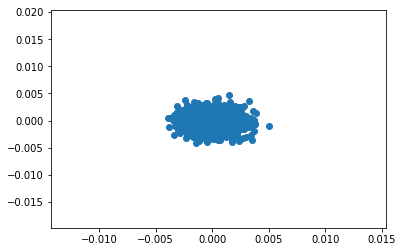

In [14]:
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
#words = word2vec_model.wv.vocab.keys()
#for i, word in enumerate(words):
#    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [15]:
word2vec_model.wv.most_similar("climate")

[('location', 0.20369262993335724),
 ('known', 0.16534394025802612),
 ('management', 0.16180355846881866),
 ('similiarly', 0.16084903478622437),
 ('targrt', 0.15576815605163574),
 ('doubt', 0.1529415398836136),
 ('total', 0.15017300844192505),
 ('viroid', 0.14601074159145355),
 ('third', 0.14585426449775696),
 ('certification', 0.14422012865543365)]

In [16]:
compileddoc=dict


In [17]:
finaldoc={}
for k,v in compileddoc.items():
    list=str
    list=" ".join([i for i in v])
    final_doc=[w for w in nltk.word_tokenize(list)]
    finaldoc[k]=final_doc

In [18]:
dictionary = corpora.Dictionary(finaldoc.values())
#dictionary.token2id

In [19]:
DT_matrix = [dictionary.doc2bow(doc) for doc in finaldoc.values()]


In [20]:
Lda_object = gensim.models.ldamodel.LdaModel

In [21]:
lda_model_1 = Lda_object(DT_matrix, num_topics=10, id2word = dictionary)

In [22]:
lda_model_1.print_topics(num_topics=10, num_words=5)

[(0,
  '0.021*"crop" + 0.011*"water" + 0.010*"agriculture" + 0.010*"loss" + 0.010*"storage"'),
 (1,
  '0.050*"water" + 0.023*"crop" + 0.015*"irrigation" + 0.012*"agriculture" + 0.011*"use"'),
 (2,
  '0.039*"crop" + 0.016*"soil" + 0.014*"seed" + 0.013*"plant" + 0.011*"pest"'),
 (3,
  '0.041*"crop" + 0.026*"soil" + 0.025*"seed" + 0.021*"plant" + 0.014*"disease"'),
 (4,
  '0.022*"crop" + 0.020*"seed" + 0.019*"soil" + 0.015*"plant" + 0.011*"agriculture"'),
 (5,
  '0.026*"crop" + 0.022*"agriculture" + 0.012*"plant" + 0.011*"production" + 0.010*"policy"'),
 (6,
  '0.033*"crop" + 0.026*"soil" + 0.018*"seed" + 0.013*"plant" + 0.012*"productivity"'),
 (7,
  '0.017*"crop" + 0.014*"agriculture" + 0.012*"plant" + 0.012*"water" + 0.009*"use"'),
 (8,
  '0.024*"water" + 0.023*"crop" + 0.020*"soil" + 0.014*"plant" + 0.012*"insect"'),
 (9,
  '0.026*"water" + 0.025*"crop" + 0.017*"soil" + 0.017*"agriculture" + 0.011*"irrigation"')]

In [23]:
def get_top_n_words(corpus,ngram_rang,n=None):
    vec = CountVectorizer(max_features=2000,ngram_range=ngram_rang).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [24]:
def graph(topdf):
    sns.set(rc={'figure.figsize':(13,8)})
    g = sns.barplot(x="Word", y="Freq",data=top_df,color="green")
    g.set_xticklabels(g.get_xticklabels(),rotation=45)
    
    for i,v in enumerate(top_df["Freq"]):
        g.text(i,v,round(v,2))
    #fig=g.get_figure()
    #fig.savefig("output.png")

In [25]:
#data_=" ".join([i for i in ])
corpus=[]
for i in compileddoc.values():
    data_=str()
    data_=" ".join([j for j in i])
    corpus.append(data_)

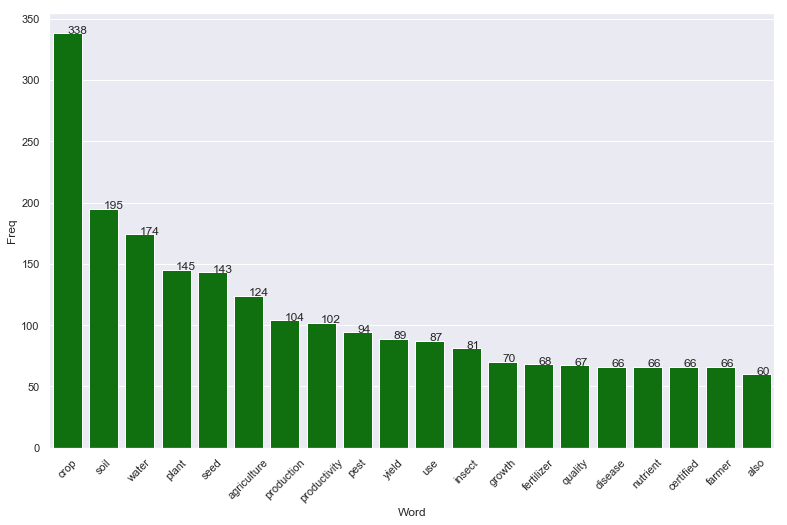

In [117]:
top_words = get_top_n_words(corpus,(1,1), n=20)
words_dict={}
word=[]
freq=[]
for i in top_words:
    word.append(i[0])
    freq.append(i[1])
words_dict["Word UG"]=word
words_dict["freq UG"]=freq
#pd_data=pd.DataFrame.from_dict(words_dict,orient='index')
top_df = pd.DataFrame(top_words,columns=["Word", "Freq"])
graph(top_df)

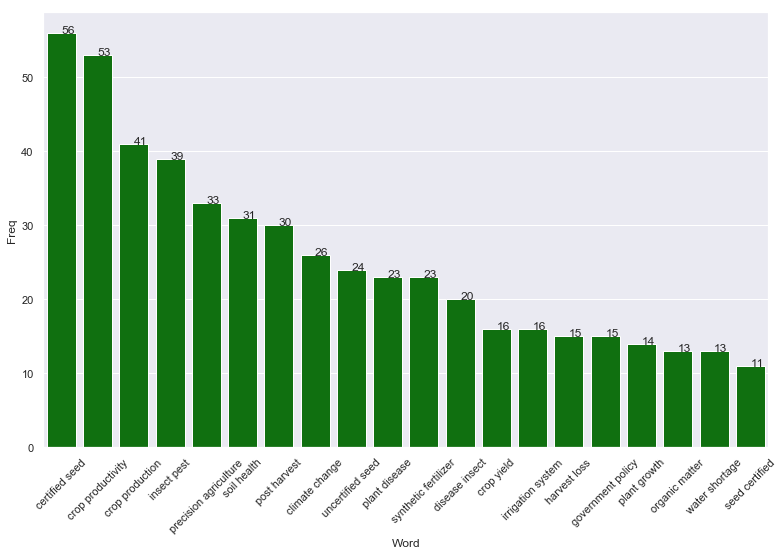

In [118]:
top_words = get_top_n_words(corpus,(2,2), n=20)
word=[]
freq=[]
for i in top_words:
    word.append(i[0])
    freq.append(i[1])
words_dict["Word BG"]=word
words_dict["freq BG"]=freq
top_df = pd.DataFrame(top_words,columns=["Word", "Freq"])

graph(top_df)

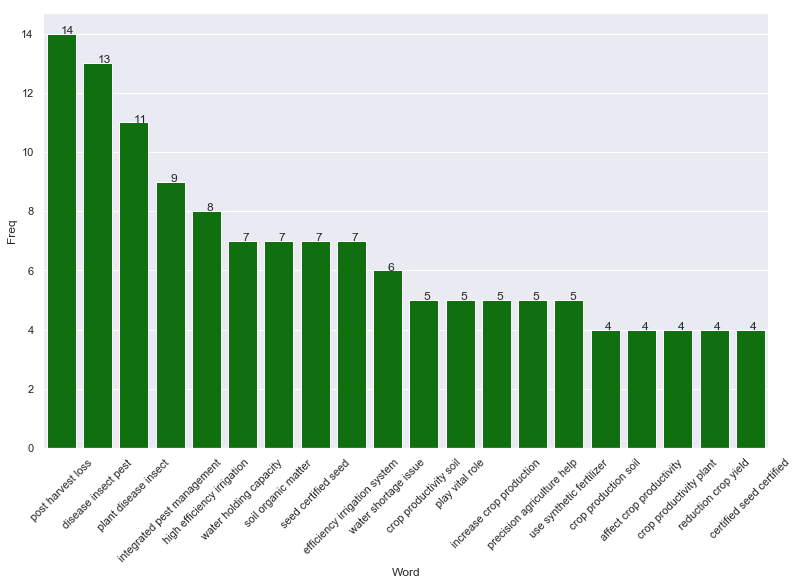

In [119]:
top_words = get_top_n_words(corpus,(3,3), n=20)
word=[]
freq=[]
for i in top_words:
    word.append(i[0])
    freq.append(i[1])
words_dict["Word TG"]=word
words_dict["freq TG"]=freq
#pd_data=pd_data.join(from_dict(words_dict,orient='index')
top_df = pd.DataFrame(top_words,columns=["Word", "Freq"])
graph(top_df)

In [125]:
pd_data=pd.DataFrame.from_dict(words_dict)
#d_data.transpose()

In [126]:
pd_data.to_excel(r"C:\\Users\\touQer_abaS\\Desktop\\AgriTop20WordFreq.xlsx")

In [29]:
cv=CountVectorizer(max_df=0.8, max_features=100, ngram_range=(1,1))
X=cv.fit_transform(corpus)

In [30]:
X[0].toarray()

array([[ 0,  9,  1,  0,  7,  7,  4, 11,  2,  0,  1,  6,  0,  0,  0,  0,
         1,  5,  2,  0,  9,  0,  3,  0,  0,  0,  0,  0,  2,  0,  3,  1,
        17,  0,  0,  0, 30, 13,  1,  2,  1,  4,  0,  1,  1,  1,  0,  1,
         1,  1,  4,  2,  3,  0,  0, 11,  0,  1,  0, 30, 10,  0,  0,  0,
         7,  0,  8,  0,  0,  2,  0,  0,  1,  0,  0,  2,  1,  1,  2,  0,
         3,  8,  2,  0,  1,  6,  0,  0,  3,  0,  0,  1,  1,  5,  0,  0,
         0,  0,  3,  3]], dtype=int64)

In [31]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [32]:
feature_names=cv.get_feature_names()

In [33]:
inpt=int(input("Enter Doc no."))
doc=corpus[inpt-1]

Enter Doc no.5


In [34]:
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [35]:
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)
 
# now print the results
print("\nDoc: {}".format(inpt))
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Doc: 5
resolve water shortage issue introducing varity crop low water requirement dam mini dam required soil moisture couservation practice shuld followed like mulching organic matter addation water shortage issue challenge agriculture reolve efficient use water deep poughing using mulch water conseque using drip sprinkle irrigation problem reduced deceloping water depicit drought tolerant genotype varities water use efficiently modification crop selection method flooding like dailp etc bcol ridge planting manage water shortage efficient utilization irrigation water using high efficiency irrigation system developing low water demanding variety various crop water conservation using modern irrigation system evolving drought tolerant variety different crop water one crucial factor crop sure ignorable based current scenario world facing water shortage issue crop production really effecting overcome minimize issue need focus loss water due various reason need use sprinkler field irrigation

In [36]:
datasetLabeling={}
reviews=[]
label=[]
labels_=["nutrient","seed","pest","disease","irrigation","climate","precision","fertilizer","harvest","policy"]
for i,l in zip(compileddoc.values(),labels_):
    for j in i:
        reviews.append(j)
        label.append(l)

In [37]:
datasetLabeling["Data"]=reviews
datasetLabeling["Label"]=label

In [38]:
Labeled_data=pd.DataFrame(datasetLabeling)

In [39]:
Labeled_data.head()

,Data,Label
0,soil complex nutriants micro organisim soil bo...,nutrient
1,soil health indicate generate good quality foo...,nutrient
2,soil medium plant growth soil good water holdi...,nutrient
3,decrease overall plant growth development ulti...,nutrient
4,poor soil poor yield many disorder cause veget...,nutrient


In [40]:
X=reviews

In [41]:
vectorizer=CountVectorizer(max_features=50,min_df=3,max_df=0.6)
BOW=vectorizer.fit_transform(X).toarray()
BOW.shape

(380, 50)

In [42]:
Tfid=TfidfTransformer()
X=Tfid.fit_transform(BOW).toarray()

In [43]:
le =LabelEncoder()
y=le.fit(label)
le.classes_

array(['climate', 'disease', 'fertilizer', 'harvest', 'irrigation',
       'nutrient', 'pest', 'policy', 'precision', 'seed'], dtype='<U10')

In [44]:
y=le.fit_transform(label)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3,stratify=y)

In [46]:

start=time.time()
model=KNeighborsClassifier(n_neighbors =3).fit(x_train,y_train)
end=time.time()
scr=model.score(x_test,y_test)*100
print("Accuracy: {}\nTime_take Train_model: {}".format(scr,end-start))


Accuracy: 78.94736842105263
Time_take Train_model: 0.028072834014892578


In [47]:
start=time.time()
pre=model.predict(x_test)
end=time.time()
print("Time_take test_model: {}".format(end-start))
expected=y_test

Time_take test_model: 0.00926065444946289


In [48]:
rcall=recall_score(y_test,pre,average='macro')
prec=precision_score(y_test,pre,average='macro')
f1=f1_score(y_test,pre,average='macro')
print("recall_score",rcall)
print("precision_score",prec)
print("f1_score",f1)

recall_score 0.7892857142857143
precision_score 0.7897222222222222
f1_score 0.7836274509803921


In [49]:
cr=classification_report(y_test,pre)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82         8
           1       0.83      0.71      0.77         7
           2       0.67      0.57      0.62         7
           3       0.67      0.75      0.71         8
           4       0.88      1.00      0.93         7
           5       0.75      0.86      0.80         7
           6       0.78      0.88      0.82         8
           7       0.75      0.75      0.75         8
           8       0.80      0.50      0.62         8
           9       1.00      1.00      1.00         8

   micro avg       0.79      0.79      0.79        76
   macro avg       0.79      0.79      0.78        76
weighted avg       0.79      0.79      0.78        76



In [50]:
confusion_matrix(y_test,pre)

array([[7, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 5, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 4, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 1, 6, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 7, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 6, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 7, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 6, 0, 0],
       [0, 1, 0, 2, 0, 0, 0, 1, 4, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 8]], dtype=int64)

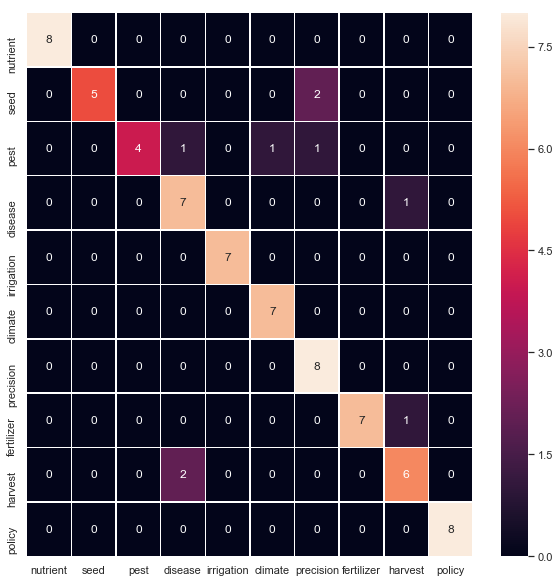

In [66]:
cm=confusion_matrix(y_test,pre)
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)
ax.xaxis.set_ticklabels(labels_)
ax.yaxis.set_ticklabels(labels_)
fig.savefig("CM.png")

In [52]:

start=time.time()
model=BernoulliNB().fit(x_train,y_train)
end=time.time()
scr_=model.score(x_test,y_test)*100
print("Accuracy: {}\nTime_take Train_model: {}".format(scr,end-start))

Accuracy: 78.94736842105263
Time_take Train_model: 0.005456686019897461


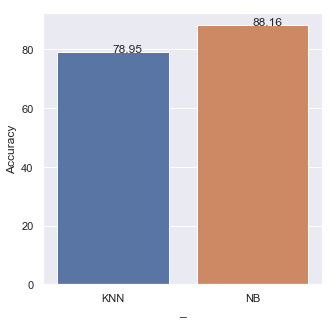

In [53]:
acuracy=[]
acuracy.append(("KNN",scr))
acuracy.append(("NB",scr_))
df=pd.DataFrame(acuracy,columns=["_","Accuracy"])
sns.set(rc={'figure.figsize':(5,5)})
g = sns.barplot(x="_", y="Accuracy",data=df)
for i,j in enumerate([scr,scr_]):
    g.text(i,j,str(round(j,2)))

In [54]:
start=time.time()
pre=model.predict(x_test)
end=time.time()
print("Time_take test_model: {}".format(end-start))
expected=y_test

Time_take test_model: 0.001947641372680664


In [55]:
cr=classification_report(y_test,pre)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.71      0.83         7
           2       1.00      0.57      0.73         7
           3       0.70      0.88      0.78         8
           4       1.00      1.00      1.00         7
           5       0.88      1.00      0.93         7
           6       0.73      1.00      0.84         8
           7       1.00      0.88      0.93         8
           8       0.75      0.75      0.75         8
           9       1.00      1.00      1.00         8

   micro avg       0.88      0.88      0.88        76
   macro avg       0.91      0.88      0.88        76
weighted avg       0.90      0.88      0.88        76



In [56]:
rcall_1=f1_score(y_test,pre,average='macro')
prec_1=precision_score(y_test,pre,average='macro')
f1_1=f1_score(y_test,pre,average='macro')
print("recall_score",rcall_1)
print("precision_score",prec_1)
print("f1_score",f1_1)

recall_score 0.87971557682084
precision_score 0.9052272727272728
f1_score 0.87971557682084


In [57]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

[0.7894736842105263, 0.8815789473684209]


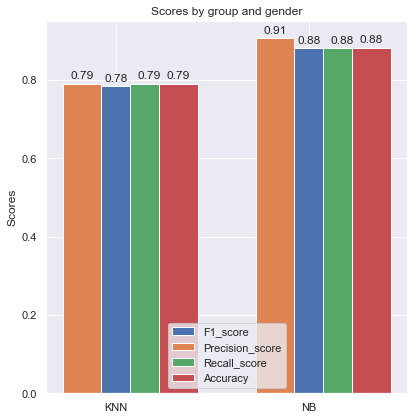

In [58]:
acuracy=[]
recal_s=[rcall,rcall_1]
prec_s=[prec,prec_1]
f1_s=[f1,f1_1]
acuracy=[scr/100,scr_/100]
print(acuracy)
labels1=["KNN","NB"]
x = np.arange(len(labels1))
fig, ax = plt.subplots(figsize=(6,6))
width = 0.35
b1=ax.bar(x,f1_s,width=0.2,label='F1_score')
b2=ax.bar(x - width/2,prec_s,width=0.2,label='Precision_score')
b3=ax.bar(x + width/2,recal_s,width=0.2,label='Recall_score')
b4=ax.bar(x + width/2+0.15,acuracy,width=0.2,label='Accuracy')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels1)
ax.legend()
autolabel(b1)
autolabel(b2)
autolabel(b3)
autolabel(b4)
fig.tight_layout()
plt.show()

[Text(0, 0.5, 'nutrient'),
 Text(0, 1.5, 'seed'),
 Text(0, 2.5, 'pest'),
 Text(0, 3.5, 'disease'),
 Text(0, 4.5, 'irrigation'),
 Text(0, 5.5, 'climate'),
 Text(0, 6.5, 'precision'),
 Text(0, 7.5, 'fertilizer'),
 Text(0, 8.5, 'harvest'),
 Text(0, 9.5, 'policy')]

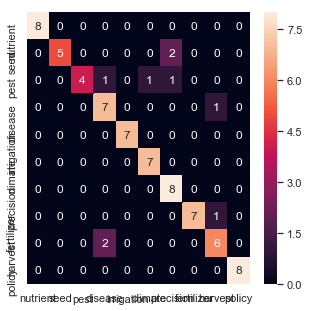

In [59]:
cm=confusion_matrix(y_test,pre)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.xaxis.set_ticklabels(labels_)
ax.yaxis.set_ticklabels(labels_)

In [60]:
#from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
print (tfidf_matrix.shape)


(10, 2115)


In [61]:
list=[]
for i in range(10):
    c=tfidf_matrix.toarray().tolist()
    c.remove(c[i])
    list.append(cosine_similarity(tfidf_matrix[i],c))

In [62]:
data=[]
for i in range(10):
    data.append(list[i].tolist()[0])

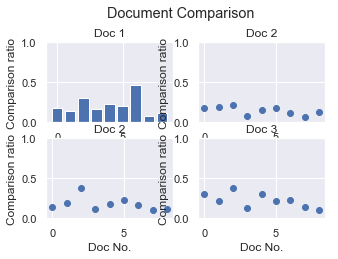

In [63]:
plt.subplot(321)
plt.suptitle("Document Comparison")
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 1")
plt.bar(range(9),np.array(data[0]))
plt.subplot(322)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 2")
plt.scatter(range(9),np.array(data[1]))
plt.subplot(323)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 2")
plt.scatter(range(9),np.array(data[2]))
plt.subplot(324)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 3")
plt.scatter(range(9),np.array(data[3]))
plt.show()


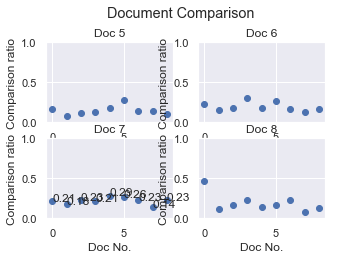

In [64]:
plt.subplot(321)
plt.suptitle("Document Comparison")
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 5")
plt.scatter(range(9),np.array(data[4]))
plt.subplot(322)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 6")
plt.scatter(range(9),np.array(data[5]))
plt.subplot(323)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 7")
plt.scatter(range(9),np.array(data[6]))
for i,j in enumerate(data[6]):
    plt.text(i,j,str(round(j,2)))
plt.subplot(324)
plt.Figure(figsize=(10,10))
plt.ylim((0,1))
plt.ylabel("Comparison ratio")
plt.xlabel("Doc No.")
plt.title("Doc 8")
plt.scatter(range(9),np.array(data[7]))
plt.show()

##### 